<a href="https://colab.research.google.com/github/lwallac2/499-Project/blob/main/MensCombined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lwallac2/499-Project/main/TestMen.csv")
df.dropna
df

In [ ]:
pd.set_option('display.max_rows',315)
pd.set_option('display.max_columns',59)
df.corr()

In [ ]:
df.dropna
df01 = pd.DataFrame(df, columns = ['G-O', 'W-O','L-O', 'W-L%','Simple Rating System', 'SOS','W-C','L-C','W-H','L-H','W-A','L-A','Team','Opp.','MP','FG','FGA', 'FG%','3P','3PA','3P%','FT','FTA','FT%', 'ORB','TRB','AST','STL','BLK','TOV','PF','AP Pre','AP Post','NCAA Tournament','W-CC','L-CC','W-L%-CC','NCAA-CC','S16-CC','FF-CC','Chmp-CC','W-CO','L-CO','W-L%-CO','NCAA-CO','S16-CO','FF-CO','Chmp-CO','Rank','Pts','Opp','MOV','OSRS','DSRS','Ortg','DRtg','NRtg','REV_MEN','EXP_MEN','NCAA Tournament Distance','Coach','School'])
df01.head()

In [ ]:
x=df01.iloc[:,:59] 
y=df01['NCAA Tournament Distance']
z=df01['Coach']
m=df01['School']

print(x)
#print(m)
#print(y)
#print(z) 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test,z_train, z_test,m_train, m_test,=  train_test_split(x,y,z,m, random_state = 0)
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("z_train shape: {}".format(z_train.shape))
print("m_train shape: {}".format(m_train.shape))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(x_train, y_train)

In [ ]:
y_pred = model1.predict(x_test)
print("Test set predictions: \n {}".format(y_pred))

In [30]:
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(x_test, y_test)))

Test set score: 0.75


In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [32]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
March_predictions = clf.predict(x_test)

In [48]:
df.loc[[288]]

School  G-O  W-O  L-O   W-L%  Simple Rating System   SOS  W-C  \
288  Valparaiso2002   31   20   11  0.645                  3.83 -1.14   12   

     L-C  W-H  L-H  W-A  L-A  Team  Opp.    MP   FG   FGA    FG%   3P  3PA  \
288    2   12    1    6    8  2194  2040  1255  772  1653  0.467  168  496   

       3P%   FT  FTA    FT%  ORB   TRB  AST  STL  ...  AP Pre  AP Post  \
288  0.339  482  738  0.653  363  1107  529  274  ...       0        0   

     NCAA Tournament NCAA Tournament Distance  W-CC  L-CC  W-L%-CC NCAA-CC  \
288                0          Did not make it    20    11    0.645       0   

     S16-CC  FF-CC  Chmp-CC  W-CO  L-CO  W-L%-CO  NCAA-CO  S16-CO  FF-CO  \
288       0      0        0    20    11    0.645        0       0      0   

     Chmp-CO  Rank   Pts   Opp   MOV  OSRS  DSRS  Ortg  DRtg  NRtg  REV_MEN  \
288        0   111  70.8  65.8  4.97 -0.21  4.05   0.0   0.0   0.0   126010   

     EXP_MEN  
288   231911  

[1 rows x 62 columns]

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, March_predictions)

0.918503674014696

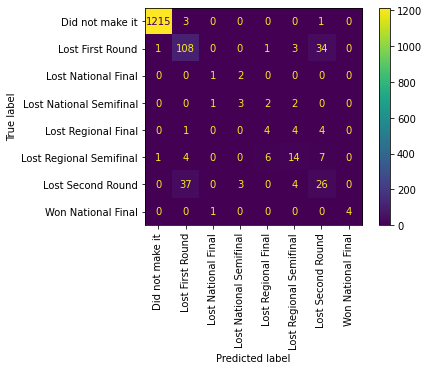

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test, xticks_rotation='vertical')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['Did not make it', 'Lost First Round', 'Lost Second Round','Lost Regional Semifinal','Lost Regional Final','Lost National Semifinal','Lost National Final','Won National Final']))

                         precision    recall  f1-score   support

        Did not make it       0.88      0.87      0.87      1219
       Lost First Round       0.25      0.23      0.24       147
      Lost Second Round       0.22      0.26      0.24        70
Lost Regional Semifinal       0.25      0.25      0.25        32
    Lost Regional Final       0.13      0.23      0.17        13
Lost National Semifinal       0.10      0.12      0.11         8
    Lost National Final       0.00      0.00      0.00         3
     Won National Final       0.33      0.20      0.25         5

               accuracy                           0.75      1497
              macro avg       0.27      0.27      0.27      1497
           weighted avg       0.76      0.75      0.75      1497



In [37]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="df.dot", 
                         feature_names=['G-O', 'W-O','L-O', 'W-L%','Simple Rating System', 'SOS','W-C','L-C','W-H','L-H','W-A','L-A','Team','Opp.','MP','FG','FGA', 'FG%','3P','3PA','3P%','FT','FTA','FT%', 'ORB','TRB','AST','STL','BLK','TOV','PF','AP Pre','AP Post','NCAA Tournament','W-CC','L-CC','W-L%-CC','NCAA-CC','S16-CC','FF-CC','Chmp-CC','W-CO','L-CO','W-L%-CO','NCAA-CO','S16-CO','FF-CO','Chmp-CO','Rank','Pts','Opp','MOV','OSRS','DSRS','Ortg','DRtg','NRtg','REV_MEN','EXP_MEN'],  
                         class_names=['Did not make it', 'Lost First Round', 'Lost Second Round','Lost Regional Semifinal','Lost Regional Final','Lost National Semifinal','Lost National Final','Won National Final'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("df.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

## Random Forest

In [39]:
rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [40]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = rf.predict(x_test)

In [42]:
# First, the accuracy score
accuracy_score(y_test, y_pred)

0.9352037408149633

In [43]:
n_estimators = 5985 # This is the number of different trees to build; default was 100; we are increasing this number tenfold.
min_samples_split = 2 # Previously, we ran this with the default split of 2
criterion='entropy' # This is for Information Gain; previously, we ran this with the Gini Index

In [44]:
rf2 = RandomForestClassifier(verbose=1, n_estimators=n_estimators, min_samples_split=min_samples_split, criterion=criterion)
rf2.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5985 out of 5985 | elapsed:  1.4min finished


RandomForestClassifier(criterion='entropy', n_estimators=5985, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5985 out of 5985 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9372077488309953


[Parallel(n_jobs=1)]: Done 5985 out of 5985 | elapsed:    1.4s finished


                         precision    recall  f1-score   support

        Did not make it       1.00      1.00      1.00      1219
       Lost First Round       0.76      0.87      0.81       147
      Lost Second Round       0.58      0.50      0.54        70
Lost Regional Semifinal       0.54      0.44      0.48        32
    Lost Regional Final       0.42      0.38      0.40        13
Lost National Semifinal       0.33      0.12      0.18         8
    Lost National Final       0.00      0.00      0.00         3
     Won National Final       0.67      0.40      0.50         5

               accuracy                           0.94      1497
              macro avg       0.54      0.46      0.49      1497
           weighted avg       0.93      0.94      0.93      1497



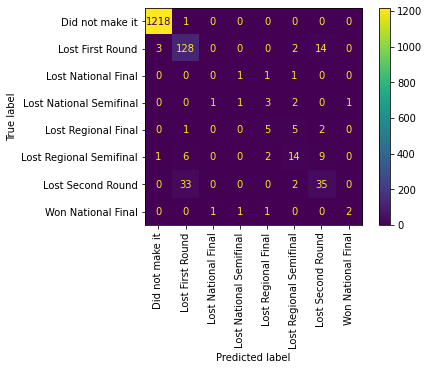

In [45]:
# Testing and predicting
import sklearn.metrics as metrics
y_pred = rf2.predict(x_test)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(rf2, x_test, y_test, xticks_rotation='vertical')
print(metrics.classification_report(y_test, y_pred, labels=['Did not make it', 'Lost First Round', 'Lost Second Round','Lost Regional Semifinal','Lost Regional Final','Lost National Semifinal','Lost National Final','Won National Final']))